In [88]:
import os
import datetime
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import  plotly.express as px
from random import randrange
from colorthief import ColorThief
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
%load_ext tensorboard

In [83]:
train_path = '/Users/matuskocian/PycharmProjects/ZADANIA/zad-3/train'
valid_path = '/Users/matuskocian/PycharmProjects/ZADANIA/zad-3/valid'
test_path = '/Users/matuskocian/PycharmProjects/ZADANIA/zad-3/test'

In [84]:
classes = os.listdir(train_path)
classes.sort()

In [85]:
#pocet obrazkov v triede
image_frame = pd.DataFrame(columns=['Sport','Count','Image'])
for folder in classes:
    folder_path = os.path.join(train_path,folder)
    num_of_img = len(os.listdir(folder_path))
    random_img = os.listdir(folder_path)[randrange(num_of_img)]
    random_img_path = folder_path+"/"+random_img
    row = {'Sport':folder, 'Count': num_of_img,'Image': folder_path+"/"+random_img}
    image_frame.loc[len(image_frame)] = row
image_frame.to_csv('number_of_pictures.csv')
fig = px.bar(image_frame, x='Sport', y='Count')
fig.write_html('plots/count_images.html')

In [ ]:
#Ziskavanie farieb z tried napisanych v liste
interesting_classes = ['football', 'giant slalom', 'hockey', 'horse jumping', 'surfing', 'water polo']
color_df = pd.DataFrame(columns=['Sport','C1','C2','C3','C4','C5'])
from collections import Counter
for folder in interesting_classes:
    folder_path = os.path.join(train_path,folder)
    num_of_img = len(os.listdir(folder_path))
    most_used_color = [folder]
    for i in range(num_of_img):
        img = os.listdir(folder_path)[i]
        img_path = folder_path+"/"+img
        color_thief = ColorThief(img_path)
        pallete = color_thief.get_color(quality=1)
        most_used_color.append(pallete)
        x = Counter(most_used_color)
        colors = []
        for color,count in x.most_common(5):
            colors.append(color)
    color_row = {'Sport':folder, 'C1': colors[0], 'C2': colors[1] ,'C3': colors[2], 'C4':colors[3],'C5':colors[4]}
    color_df.loc[len(color_df)] = color_row
color_df.to_csv('5_most_colors_sport.csv')

In [ ]:
#5 najviac farieb podla kategorie
iterations = 5
for i in range(6):
    colors_to_plot = color_df.loc[i, :].values.tolist()
    palette = colors_to_plot[1:]
    width_px=1000
    new = Image.new(mode="RGB", size=(width_px,120))
    for j in range(iterations):
        newt = Image.new(mode="RGB", size=(width_px//iter,100), color=palette[j])
        new.paste(newt, (j*width_px//iter,10))
    new.save('plots/' + str(colors_to_plot[0])+'.png')

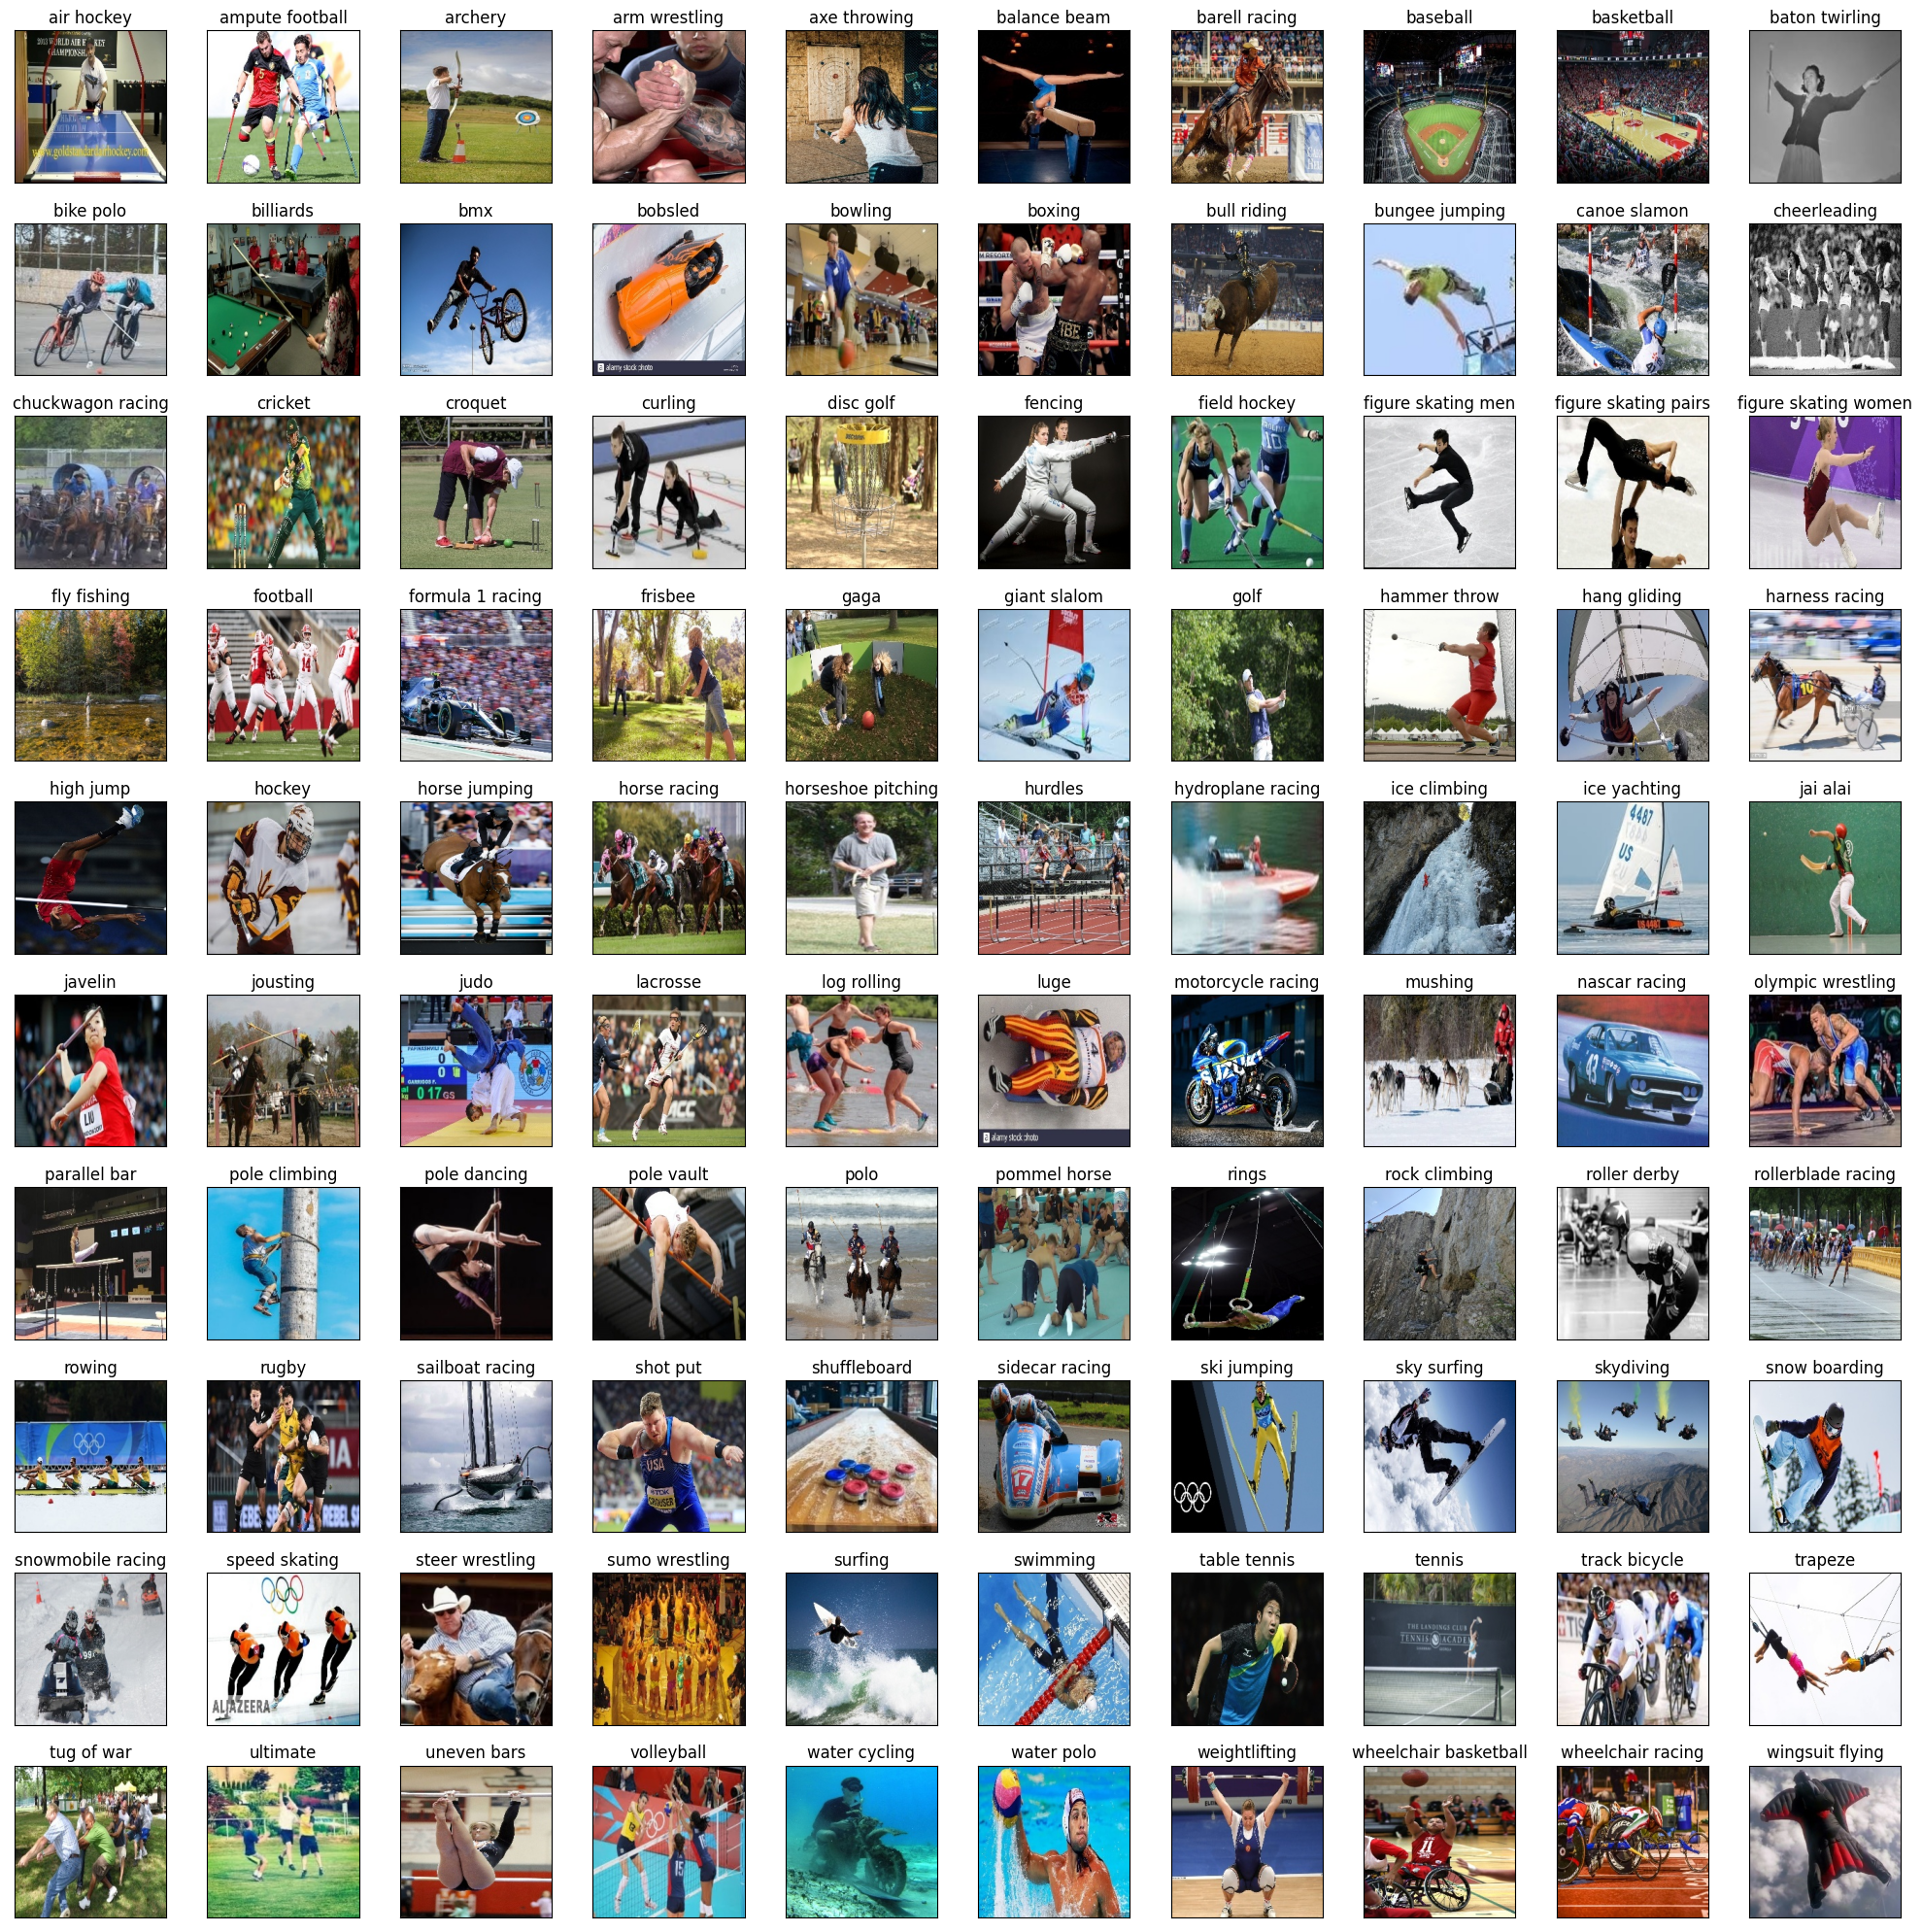

In [89]:
img_size = (100,100)
batch_size = 128

fig = plt.figure(figsize=(20, 20))
columns = 10
rows = 10
for index,row in image_frame.iterrows():
    im = Image.open(row['Image'])
    fig.add_subplot(rows, columns, index + 1)
    plt.title(row['Sport'])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(im)
fig.tight_layout()
plt.savefig('plots/randomSport.png')

In [7]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')
resnet_preds = pd.DataFrame(columns=['Sport','predicted_item_1','acc1','predicted_item_2','acc2', 'img'])
for folder in classes:
    folder_path = os.path.join(train_path,folder)
    num_of_img = len(os.listdir(folder_path))
    for i in range(30):
        img = os.listdir(folder_path)[i]
        img_path = folder_path+"/"+img
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        preds = model.predict(x)
        predicted_value = decode_predictions(preds, top=3)[0]
        pred_row = {'Sport':folder, 'predicted_item_1': predicted_value[0][1],'acc1': predicted_value[0][2], 'predicted_item_2': predicted_value[1][1] ,'acc2': predicted_value[1][2], 'img':img_path}
        resnet_preds.loc[len(resnet_preds)] = pred_row
resnet_preds.to_csv('resnet_on_30_pics_each_sport.csv')



1/1 [==============================] - 0s 132ms/step


In [22]:
df = resnet_preds.drop_duplicates(subset=['Sport' ,'predicted_item_1'])
# fig = px.scatter(df ,x='Sport',y='predicted_item_1')
# fig.show
count_df = df.groupby(['Sport'])['Sport'].count().reset_index(name='different_items')
fig = px.bar(count_df, x='Sport', y='different_items', title='Number of different predictios for each group (1st 30 pictures from each group)')
fig.write_image('plots/count_1_diff_item.png')

In [26]:
arm_wrestling = pd.DataFrame(columns=['Sport','predicted_item_1','acc1', 'predicted_item_2','acc2','predicted_item_3','acc3','predicted_item_4','acc4','img'])
i_class = ['arm wrestling']
for folder in i_class:
    folder_path = os.path.join(train_path,folder)
    num_of_img = len(os.listdir(folder_path))
    for i in range(num_of_img):
        img = os.listdir(folder_path)[i]
        img_path = folder_path+"/"+img
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        preds = model.predict(x)
        predicted_value = decode_predictions(preds, top=5)[0]
        pred_row = {'Sport':folder, 'predicted_item_1': predicted_value[0][1],'acc1': predicted_value[0][2], 'predicted_item_2': predicted_value[1][1] ,'acc2': predicted_value[1][2],
                    'predicted_item_3': predicted_value[2][1] ,'acc3': predicted_value[2][2],
                    'predicted_item_4': predicted_value[3][1] ,'acc4': predicted_value[3][2]
                    , 'img':img_path,}
        arm_wrestling.loc[len(arm_wrestling)] = pred_row
arm_wrestling.to_csv('resnet_arm_wrestling.csv')

1/1 [==============================] - 0s 155ms/step


In [79]:
pred_df = arm_wrestling.melt(id_vars=['Sport','predicted_item_1'],value_vars =['acc1'],var_name='acc_type', value_name='acc')
pred_df1 = arm_wrestling.melt(id_vars=['Sport','predicted_item_2'],value_vars =['acc2'],var_name='acc_type', value_name='acc')
pred_df2 = arm_wrestling.melt(id_vars=['Sport','predicted_item_3'],value_vars =['acc3'],var_name='acc_type', value_name='acc')
pred_df3 = arm_wrestling.melt(id_vars=['Sport','predicted_item_4'],value_vars =['acc4'],var_name='acc_type', value_name='acc')
# pred_df2 = arm_wrestling.melt(id_vars=['Sport'],value_vars =['acc2'],var_name='acc_type', value_name='acc')
pred_df.columns = ['Sport','Predicted Item', 'acc_type', 'acc']
pred_df1.columns = ['Sport','Predicted Item', 'acc_type', 'acc']
pred_df2.columns = ['Sport','Predicted Item', 'acc_type', 'acc']
pred_df3.columns = ['Sport','Predicted Item', 'acc_type', 'acc']

df_arm_wrestling = pd.concat([pred_df,pred_df1,pred_df2,pred_df3])
df_arm_wrestling = df_arm_wrestling[df_arm_wrestling['acc'] > 0.1]
df_mean_arm_wrestling = df_arm_wrestling.groupby(['Predicted Item'])['acc'].mean().reset_index()


fig = px.bar(df_mean_arm_wrestling,x ='Predicted Item', y='acc' ,title="Priemerna uspesnost najdenych objektov v arm wrestling (acc > 0.1)")
fig.write_html('plots/arm_wrestling_mean_items.html')

fig = px.scatter(df_arm_wrestling,x ='Predicted Item', y='acc', color='acc_type', title="Top 4 najdenych objektov v arm wrestling (acc > 0.1)")
fig.write_html('plots/arm_wrestling_items.html')

In [77]:
archery = pd.DataFrame(columns=['Sport','predicted_item_1','acc1', 'predicted_item_2','acc2','predicted_item_3','acc3','predicted_item_4','acc4','img'])
i_class = ['archery']
for folder in i_class:
    folder_path = os.path.join(train_path,folder)
    num_of_img = len(os.listdir(folder_path))
    for i in range(num_of_img):
        img = os.listdir(folder_path)[i]
        img_path = folder_path+"/"+img
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        preds = model.predict(x)
        predicted_value = decode_predictions(preds, top=5)[0]
        pred_row = {'Sport':folder, 'predicted_item_1': predicted_value[0][1],'acc1': predicted_value[0][2], 'predicted_item_2': predicted_value[1][1] ,'acc2': predicted_value[1][2],
                    'predicted_item_3': predicted_value[2][1] ,'acc3': predicted_value[2][2],
                    'predicted_item_4': predicted_value[3][1] ,'acc4': predicted_value[3][2]
                    , 'img':img_path,}
        archery.loc[len(archery)] = pred_row
archery.to_csv('resnet_archery.csv')

1/1 [==============================] - 0s 101ms/step


In [78]:
pred_df = archery.melt(id_vars=['Sport','predicted_item_1'],value_vars =['acc1'],var_name='acc_type', value_name='acc')
pred_df1 = archery.melt(id_vars=['Sport','predicted_item_2'],value_vars =['acc2'],var_name='acc_type', value_name='acc')
pred_df2 = archery.melt(id_vars=['Sport','predicted_item_3'],value_vars =['acc3'],var_name='acc_type', value_name='acc')
pred_df3 = archery.melt(id_vars=['Sport','predicted_item_4'],value_vars =['acc4'],var_name='acc_type', value_name='acc')
pred_df.columns = ['Sport','Predicted Item', 'acc_type', 'acc']
pred_df1.columns = ['Sport','Predicted Item', 'acc_type', 'acc']
pred_df2.columns = ['Sport','Predicted Item', 'acc_type', 'acc']
pred_df3.columns = ['Sport','Predicted Item', 'acc_type', 'acc']

df_archery = pd.concat([pred_df,pred_df1,pred_df2,pred_df3])
df_archery = df_archery[df_archery['acc'] > 0.1]
df_mean_archery = df_archery.groupby(['Predicted Item'])['acc'].mean().reset_index()


fig = px.bar(df_mean_archery,x ='Predicted Item', y='acc', title="Priemerna uspesnost najdenych objektov v archery (acc > 0.1)")
fig.write_html('plots/archery_mean_items.html')

fig = px.scatter(df_archery,x ='Predicted Item', y='acc', color='acc_type', title="Top 4 objektov v archery a ich uspenosti (acc > 0.1)")
fig.write_html('plots/archery_items.html')

In [91]:

# Data Augmentation
image_generator = ImageDataGenerator(
        rescale=1/255,
        rotation_range=10, # rotation
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
)

#Train & Validation Split
train_dataset = image_generator.flow_from_directory(batch_size=batch_size,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=img_size,
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=batch_size,
                                                 directory=valid_path,
                                                 shuffle=True,
                                                 target_size=img_size,
                                                 class_mode='categorical')

image_generator_submission = ImageDataGenerator(rescale=1/255)
test_dataset = image_generator.flow_from_directory(batch_size=batch_size,
                                                 directory=test_path,
                                                 shuffle=False,
                                                 target_size=img_size,
                                                 class_mode='categorical')

Found 13572 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


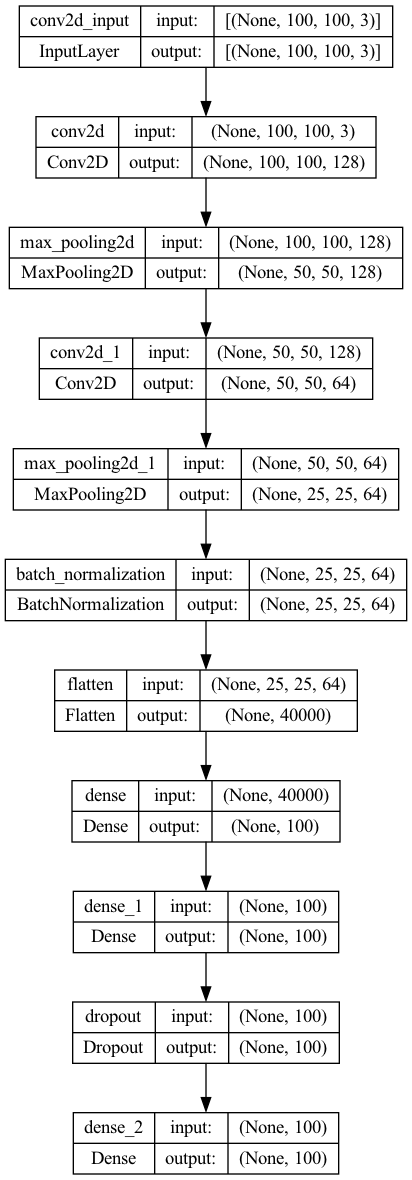

In [94]:
from keras.layers import Conv2D, BatchNormalization, GlobalAveragePooling2D, Dropout, Dense, MaxPool2D, Flatten
from keras import Sequential

model = Sequential()
model.add(Conv2D(128,(5,5), padding="same", input_shape=img_size + (3,), activation='relu')),
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(64, 3, padding="same", activation='relu')),
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization()),

model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(units=100, activation='softmax'))
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
log_dir = "/Users/matuskocian/PycharmProjects/ZADANIA/zad-3/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("/Users/matuskocian/PycharmProjects/ZADANIA/zad-3/checkpoints/save_at_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True),
    tensorboard_callback,
]
model.compile(
    optimizer=keras.optimizers.Adam(0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
model.summary()

In [ ]:
History = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset,
    callbacks=callbacks
)

In [ ]:
print("Plotting accuracy versus epoch")
plt.plot(History.history['accuracy'], label='accuracy')
plt.plot(History.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('overtrain.png')
print("The model is being evaluated")
test_loss, test_acc = History.model.evaluate(test_ds, verbose=2)
print("The accuracy of the model is:")
print(test_acc)

In [ ]:
predicted = History.model.predict(test_ds)


In [ ]:
predicted_classes = np.argmax(predicted, axis=1)
predicted_classes

In [ ]:
test_ds

In [ ]:
#from keras.models import Sequential
#from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

# build a sequential model
#model = Sequential()
#model.add(InputLayer(input_shape=(224, 224, 3)))

# 1st conv block
#model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
#model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# 2nd conv block
#model.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))
#model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
#model.add(BatchNormalization())
# 3rd conv block
#model.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
#model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
#model.add(BatchNormalization())
# ANN block
#model.add(Flatten())
#model.add(Dense(units=100, activation='relu'))
#model.add(Dense(units=100, activation='relu'))
#model.add(Dropout(0.25))
# output layer
#model.add(Dense(units=10, activation='softmax'))

# compile model
#model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# fit on data for 30 epochs
#model.fit_generator(train, epochs=30, validation_data=val)

In [96]:
pretrained_model = ResNet50(input_shape= img_size + (3,),
                            include_top = False,
                            weights= 'imagenet')

46759936/94765736 [=============>................] - ETA: 7:44


KeyboardInterrupt



In [92]:
import tqdm

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


X_train, y_train = next(train_dataset)

for i in tqdm.tqdm(range(len(train_dataset)-1)):
    img, label = next(train_dataset)
    X_train = np.append(X_train, img, axis=0)
    y_train = np.append(y_train, label, axis=0)


100%|██████████| 106/106 [05:52<00:00,  3.33s/it]


In [95]:
global_average_layer = GlobalAveragePooling2D()
z_train = preprocess_input(X_train)
z_train = pretrained_model.predict(z_train)
feature_batch = global_average_layer(z_train)
X_train_feature = np.array(feature_batch)
X_train_feature

NameError: name 'pretrained_model' is not defined